<a href="https://colab.research.google.com/github/knxm/sympy_code/blob/main/intro_python_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python, SymPy, Matplotlib, Plotly, NumPy

とりあえず，基本的なことをまとめておきました．詳しくはマニュアルを参照してください．

*   https://docs.python.org/ja/3.6/tutorial/
*   https://docs.sympy.org/latest/index.html
*   https://matplotlib.org/contents.html
*   https://plotly.com/python/
*   https://numpy.org/doc/stable/
*   http://www.turbare.net/transl/scipy-lecture-notes/index.html


# 二項間演算子


*   加減乗除 `+, -, * /'
*   べき乗 `**`
*   剰余 %



In [ ]:
2+3

5

In [ ]:
12-8

4

In [ ]:
2*3

6

In [ ]:
1/3

0.3333333333333333

In [ ]:
2**3

8

# SymPy


In [ ]:
from sympy import *
print(1/2 + 1/3)
print(Rational(1, 2)+Rational(1, 3))


0.8333333333333333
5/6


# 定数


*   円周率 pi
*   ネイピア数 E



In [ ]:
pi

pi

In [ ]:
pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [ ]:
E

E

In [ ]:
E.evalf()

2.71828182845905

In [ ]:
oo.evalf()

inf

# 変数の宣言と展開，簡略化，因数分解，微分積分

ちょっと面倒ですが，変数の宣言が必要です．
MathematicaやMapleは，こういった作業は必要ないのですが，
Open Source系の数式処理システムでは，よくあることなので，慣れてしまえば気にならなくなります．

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
expand((x+y)*(x-y))

x**2 - y**2

```
init_printing()
```
を実行することで数式が美しく表示される．

詳しくは[printing](https://docs.sympy.org/latest/tutorial/printing.html)を参照してください．

In [ ]:
init_printing()
expand((x+y)*(x-y))

In [ ]:
expand(cos(x + y), trig=True)

`expand, simplify, factor, diff, integrate` 等，基本的な数式処理機能は備えています．

In [ ]:
simplify(sin(x)**2+cos(x)**2)

In [ ]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [ ]:
factor(x**3 - 1)

In [ ]:
diff(log(x), x)

In [ ]:
diff(x**(x**x), x)

$\dfrac{1}{x}$の不定積分が$\log |x|$ではなく，$\log x$になってしまうのは，注意が必要ですね．

In [ ]:
integrate(1/x, x)

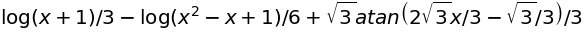

In [ ]:
integrate(1/(x**3+1), x)

## for文

Pythonの制御文も使えます．


In [ ]:
from sympy import *
init_printing()
x, y, z = symbols('x y z')
f=Function('f')
for i in range(10):
  f=(x+1)**i
  display(expand(f))

## 微分方程式


In [ ]:
from sympy import *
init_printing()
a, x = symbols('a x')
y = Function('y')(x)
eq = Eq(diff(y, x),  -a*y)
dsolve(eq)

## グラフ描画
グラフ描画については，数式処理ライブラリのSympyで描くこともできます．内部的にはMatplotlibを呼び出しているようです．https://docs.sympy.org/latest/modules/plotting.html

グラフ描画ライブラリについては[Matplotlib](https://matplotlib.org/)の方が有名ですが，最近は[Plotly](https://plotly.com/python/)についての紹介記事も増えてきたようです．


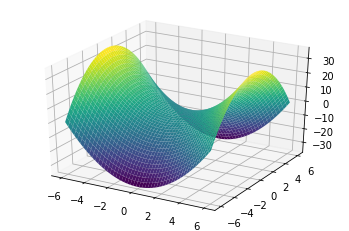

In [ ]:
from sympy import symbols
from sympy.plotting import plot3d
x, y = symbols('x y')
plot3d(x**2-y**2, (x, -6, 6), (y, -6, 6))

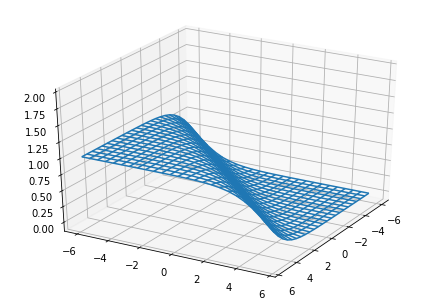

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-6.0, 6.0, 0.5)
y = np.arange(-6.0, 6.0, 0.5)
X, Y = np.meshgrid(x, y)
def softmax(x, y):
  return (np.exp(x)) / (np.exp(x) + np.exp(y))

Z=softmax(X, Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=30, azim=30)
ax.plot_wireframe(X, Y, Z)
ax.set_zlim(-0.1, 2)

plt.show()

In [ ]:
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt

def f(x, y):
  return np.exp(x)/(np.exp(x)+np.exp(y))

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
 
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
fig.update_layout(
  title_text='$f(x, y)=\dfrac{e^{x}}{e^{x}+e^{y}}$',
  scene = dict(
    xaxis = dict(nticks=4, range=[-6, 6],),
    yaxis = dict(nticks=4, range=[-6, 6],),
    zaxis = dict(nticks=4, range=[-0.1,2],),
  ),
  height=400,
  margin=dict(r=20, l=10, b=10, t=10)
)
fig.show()

In [ ]:
# https://plotly.com/python/3d-surface-plots/
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Equation of ring cyclide
# see https://en.wikipedia.org/wiki/Dupin_cyclide
import numpy as np
a, b, d = 1.32, 1., 0.8
c = a**2 - b**2
u, v = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
x = (d * (c - a * np.cos(u) * np.cos(v)) + b**2 * np.cos(u)) / (a - c * np.cos(u) * np.cos(v))
y = b * np.sin(u) * (a - d*np.cos(v)) / (a - c * np.cos(u) * np.cos(v))
z = b * np.sin(v) * (c*np.cos(u) - d) / (a - c * np.cos(u) * np.cos(v))

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Color corresponds to z', 'Color corresponds to distance to origin'],
                    )

fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07), 1, 1)
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=x**2 + y**2 + z**2), 1, 2)
fig.update_layout(title_text="Ring cyclide")
fig.show()

In [ ]:
# https://plotly.com/python/sliders/
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()